# Analysis of the relationship between cigarette sales per capita and median income by States in the US
by Group 14 (Zilin Zhang, Jiangyue Chen, Daniel Jang, Isabel Adelhardt)

## Introduction of Project

In this project, we aim to analyze the relationship between cigarette sales per capita and median income in 51 different states in the United States from 2013 to 2019. Cigarette smoking can have a wide range of negative effects on a person's health, and we want to figure out whether income is a major factor  affecting people's smoking habits. 

In order to approach to our conclusion, we are going to calculate and plot the changing trend of cigarette sales per capita and median income in 51 different states in the U.S. from 2013 to 2019. After knowing the general trend of these two variables, we are going to calculate the regression and come out with a final conclusion.

## Data sources

We need to collect the data of cigarette sales and median income to complete our analysis. 

1. Cigarette sales' data source: [US Chronic Disease Indicators](https://chronicdata.cdc.gov/Chronic-Disease-Indicators/U-S-Chronic-Disease-Indicators-Tobacco/rrbt-bhen)

2. Median income's data source: [U.S. Bureau of the Census](https://www2.census.gov/programs-surveys/cps/tables/time-series/historical-income-households/h08.xls)

## Hypothesis: Whether median income per state has an impact to sales of cigarette per capita

In order to examine our assumption, we think the following data analysis are essential:

1. plot and analyze the changing trend of cigarette sales per capita in each states in the U.S. from 2013 to 2019
2. plot and analyze the changing trend of median income in each states in the U.S. from 2013 to 2019
   
   · if each state has a +/- difference in median income between years does this relate to the difference in sales

3. regression plot for the sales data and median income in each state per year to figure out the relationship of two variables

In [1]:
import pandas as pd
from IPython.display import Image, HTML
from project_tools.dataformat import *

## Raw Data Preprocessing 


### Step 1: Tobacco sales data in each state per year form 2013 - 2019

Reading in Tobacco sales data from [US Chronic Disease Indicators](https://chronicdata.cdc.gov/Chronic-Disease-Indicators/U-S-Chronic-Disease-Indicators-Tobacco/rrbt-bhen).
This data set contains many survey questions, and for our project we chose the question "Sale of cigarette packs" in the unit of "pack sales per capita". We filtered out necessary columns such as the year, state, question, data value unit, and data value for the use of average sales of cigarette packs per capita by state form 2013 to 2019. It has came to our attention that this data set is missing data values for the year of 2015, so we ignored the year 2015 in our subsequent analysis.

In [2]:
# import cleaned-up tobacco average sales data
states_sales = tobacco_data_import()
states_sales

YearStart   LocationDesc LocationAbbr                 Question  \
0         2013        Alabama           AL  Sale of cigarette packs   
1         2013         Alaska           AK  Sale of cigarette packs   
2         2013        Arizona           AZ  Sale of cigarette packs   
3         2013       Arkansas           AR  Sale of cigarette packs   
4         2013     California           CA  Sale of cigarette packs   
..         ...            ...          ...                      ...   
325       2019       Virginia           VA  Sale of cigarette packs   
326       2019     Washington           WA  Sale of cigarette packs   
327       2019  West Virginia           WV  Sale of cigarette packs   
328       2019      Wisconsin           WI  Sale of cigarette packs   
329       2019        Wyoming           WY  Sale of cigarette packs   

             DataValueUnit DataValue  
0    pack sales per capita      64.6  
1    pack sales per capita        39  
2    pack sales per capita      24.4  
3    pack sales per capita      57.5  
4    pack sales per capita      23.9  
..                     ...       ...  
325  pack sales per capita      51.6  
326  pack sales per capita        15  
327  pack sales per capita        75  
328  pack sales per capita      35.4  
329  pack sales per capita      49.4  

[306 rows x 6 columns]

### Step 2: Median income in each state per year from 2013 - 2019

Reading in median income data which is from Source: U.S. Bureau of the Census, Current Population Survey, Annual Social and Economic Supplements. For information on confidentiality protection, sampling error, nonsampling error, and definitions, see <www2.census.gov/programs-surveys/cps/techdocs/cpsmar19.pdf>.


We are using 2017 Median income instead of 2017(40) because 2017(40) represents data from a new data processing system. The 2017(40) data should be used for analysis of median income after 2017, but our analysis relates mostly to before 2017.

We are using 2013(38) beause 2013(39) represents data from individuals who received new income questions. These new income questions were not used in the following years, so we are disregarding this data. 

See more about how we process the median income data in `project_tools/dataformat.py`.

In [3]:
# import cleaned-up median income data
median_income = income_data_import()
median_income.head()

Location 2019 Median income 2018 Median income 2017 Median income  \
1     Alabama            56200.0            49936.0            51113.0   
2      Alaska            78394.0            68734.0            72231.0   
3     Arizona            70674.0            62283.0            61125.0   
4    Arkansas            54539.0            49781.0            48829.0   
5  California            78105.0            70489.0            69759.0   

  2016 Median income 2015 Median income 2014 Median income 2013 Median income  \
1            47221.0            44509.0            42278.0            41381.0   
2            75723.0            75112.0            67629.0            61137.0   
3            57100.0            52248.0            49254.0            50602.0   
4            45907.0            42798.0            44922.0            39919.0   
5            66637.0            63636.0            60487.0            57528.0   

   avg_med_income state  
1    47519.714286    AL  
2    71280.000000    AK  
3    57612.285714    AZ  
4    46670.714286    AR  
5    66663.000000    CA

## Exploratory Data Analysis

### Step 1: Plot and analysis the trend of cigarette sales per capita in each state in the U.S per year from 2013-2019

In this very first step, we want to figure out the general changing trend of cigarette sales per capita in each state in the U.S. from 2013 to 2019, in order to compare with the change in media income. 

In `sales-of-cigarette-each-state.ipyny`, the notebook present detail coding of the resulting plot below. 

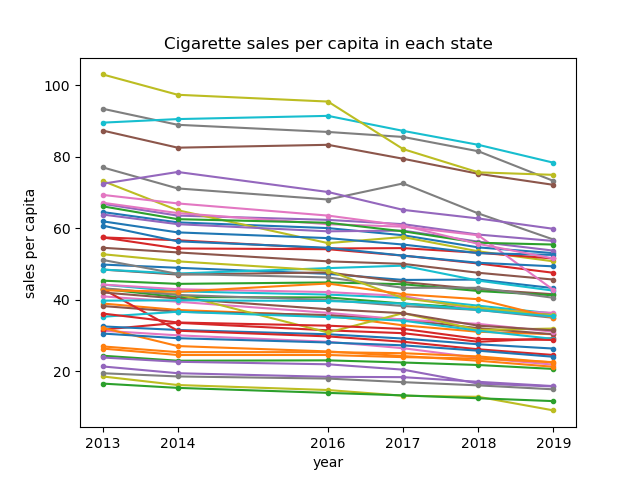

In [4]:
Image("output/sales-of-cigarette-each-state.png")

Firstly, in order to best present the change, we decided to use line charts to show the change in cigarette sales per capita in each state from 2013 to 2019. Moreover, as the data in 2015 in the original source is missing, we then decided to skip this year.

In general, from the line chart with 51 lines presenting the changing trend of cigarette sales in 51 states from 2013 to 2019, we can clearly see that the general trend of cigarette sales in each state is decreasing. Even though some states experienced fluctuation, the general trend in every state is still decreasing. 

## Step 2: Comparing Chorolepth map plots for cigaretts sales and median income

In this step we are looking at the choropleth map plots for both the average cigarettes sales and median income data for each state in each year from 2013 to 2019. We decided to show only one plot each for average sales and median income because more html files would make this notebook too large in memory to display. And these two plots are specifically in the year of 2018. More plots can be found in the `output/` folder, and we've also included png versions of the html plots in the `figures/` folder. 

In [5]:
HTML(filename = 'output/avgSales2018.html')

In [6]:
HTML(filename = 'output/medianIncome2018.html')

Just by looking at the plots, we failed to find any significant or meaningful relationship between the sales and income in each state just by visualizing the graphs and understanding which states has higher sales per capita and which states has higher median income. The states with higher income doesn't seem to have a higher or a lower average sales of cigarettes, and neither with the opposite. More analysis could be found in the notebook `MapPlot.ipynb`. And thus we went one step further and conducted a regression analysis on the two data in the next Notebook.

### Step 3: Linear Regression

In this step we want to see if there exists a linear relationship between average median income and tobacco sales at the state level. We chose to look at California, West Virginia, Maryland, Kentucky, and New Hampshire. We used the information from the analysis above to choose these states. We chose California because we live here, Maryland because it was one of the states with the higheset average median income, West Virginia and Kentucky because it was one of the lowest average median income amd the highest number of sales, and New Hampshire because it was one of the states with the highest median income and highest sales. We decided to run simple linear regression on the data given for these three states and we produced the following figures.

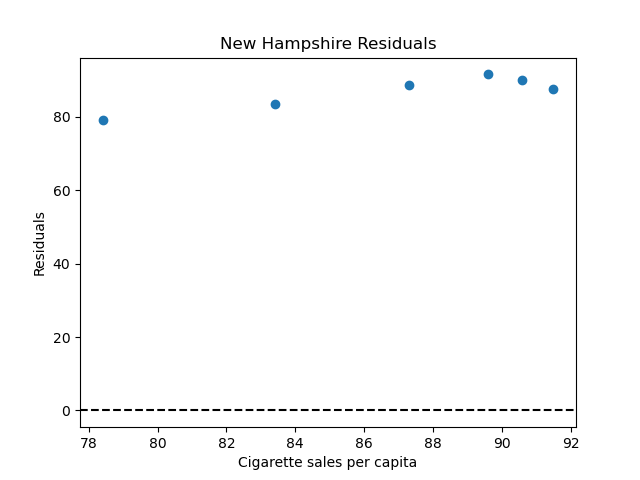

In [7]:
Image("output/new_hampshire_residuals.png")

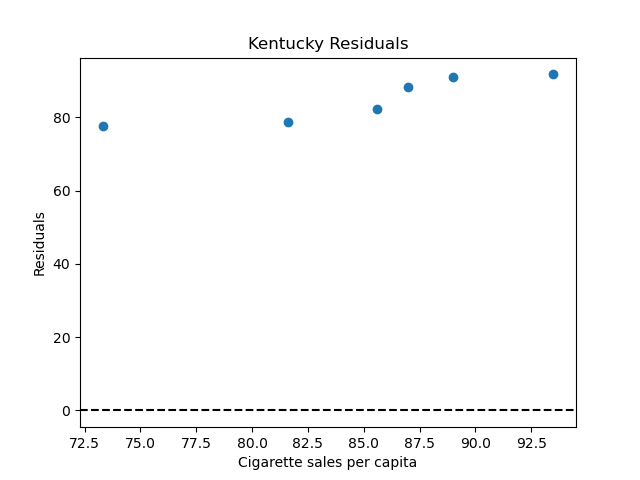

In [8]:
Image("output/kentucky_residuals.png")

Looking at these states we can see that cigarette sales are decreasing throughout the country. However, in states where cigarette sales per capita consistently remain higher than the national average, there appears to be a non-linear relationship between average median income and cigarette sales. When we tried to model cigarette sales using the average median income in both New Hampshire and Kentucky through simple linear regression, we found that these variables did not have a strong linear relationship. After creating the residual plots for both of these states, we observed a similar pattern. This lets us conclude that the relationship between cigarette sales and average median income is not linear in these states. 

## Conclusion

We found that the cigarette sales per capita are decreasing with time in every state. We then used the maps of cigarette sales and average median income to choose our 5 states to conduct our analysis on. Using simple linear regression, we found that California, West Virginia, and Maryland all had a linear relationship between the cigarette sales per capita and average median income. However, Kentucky and New Hampshire did show a linear relationship between these two variables. These were 2 of the states that were darkest on the maps of cigarette sales per capita. It seems that as states sell more cigarettes per capita than the national, the relationship between cigarette sales and average median income becomes less and less linear. This conclusion is based on the analaysis in this paper. We would need to explore this relationship in more states that have low cigarette sales and high. We also need to note that the linear relationship that we found in California, West Virginia, and Maryland may be linear because of confounding variables and other factors we have not accounted for in this paper. In our effort to explore the relationship between tobacco sales and average median income, we found that in most states the relationship is fairly linear where the cigarette sales per capita decreases as the average median income decreases. 

## Author Contribution

### Jiangyue Chen

    1. Completed the data analysis and representation of sales of cigarette in the U.S. from 2013 to 2019
    2. Added installable packages
    3. Selected and added the LICENSE to the project
    4. Built the structure for README file

### Isabel Adelhardt
    1. Completed Regression analysis
    2. completed Makefile
    3. Conclusion
    

### Zilin Zhang
    
    1. Completed choropleth map plots analysis
    2. Set up Github Actions
    3. Set up Binder
    4. Managed overall project structures

### Daniel Jang
    
    1. Created Jupyterbook
    2. Completed testfiles
    3. Built up Environment